In [2]:
#install library in your environment
!pip install minisom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12042 sha256=f6dc97f072ead77567cb2c991102bd86a7e87b67ebfacb883eb1067432905aaf
  Stored in directory: c:\users\surai\appdata\local\pip\cache\wheels\19\db\95\5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


In [1]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#load data from drive
header_name = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', names=header_name)

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [7]:
X.shape, y.shape

((150, 4), (150,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [10]:
# Fit and transform the Train/Test data using same pre-processing object
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [11]:
type(X_test)

numpy.ndarray

In [14]:
#turn df to numpy array as SOM library accepts data without header
#X_test=X_test.values

In [12]:
# Initialize SOM, it doesn't make use of target label y
som = MiniSom(x=7, y=7, input_len=4, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_train)
som.train_random(X_train, num_iteration=100)

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Now y_train will have values 0, 1, 2
y_test = label_encoder.fit_transform(y_test)  # Now y_train will have values 0, 1, 2

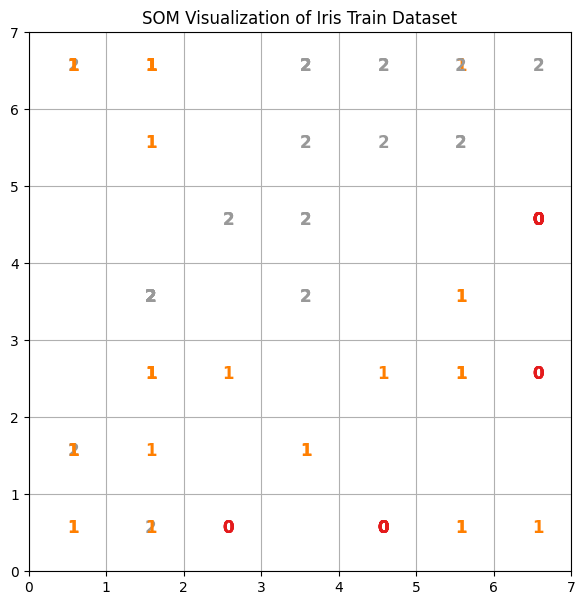

In [14]:
# Visualize the results
plt.figure(figsize=(7, 7))
for i, x in enumerate(X_train):
    w = som.winner(x)
    plt.text(w[0] + 0.5, w[1] + 0.5, str(y_train[i]),
             color=plt.cm.Set1(y_train[i] / 2.), fontdict={'weight': 'bold', 'size': 12})
plt.xlim([0, 7])
plt.ylim([0, 7])
plt.grid()
plt.title("SOM Visualization of Iris Train Dataset")
plt.show()
#som.winner(x) – What it does:
#Given an input vector x, this function finds the 
# Best Matching Unit (BMU) on the Self-Organizing Map.
#The BMU is the neuron whose weight vector is closest 
# (usually using Euclidean distance) to the input vector x.

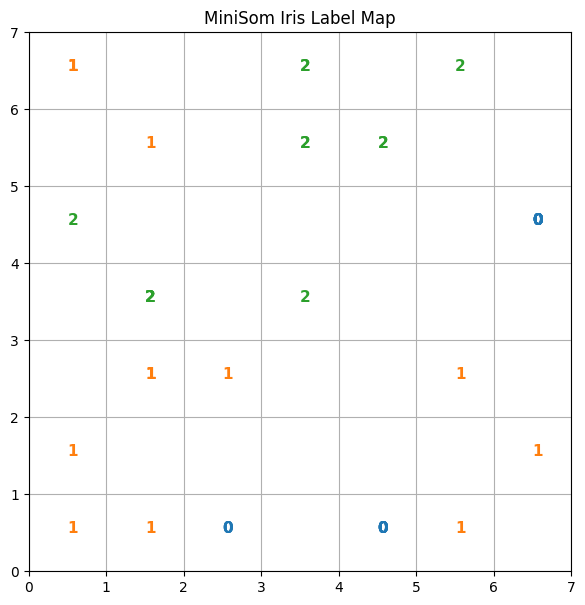

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
for i, x in enumerate(X_test):
    w = som.winner(x)
    plt.text(w[0]+0.5, w[1]+0.5, str(y_test[i]),
             color=plt.cm.tab10(y_test[i]),
             fontdict={'weight': 'bold', 'size': 11})
plt.xlim([0, 7])
plt.ylim([0, 7])
plt.title("MiniSom Iris Label Map")
plt.grid()
plt.show()


In [23]:
w

(6, 3)